# Lab 6: Natural Spline Interpolation

### Given the data

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
x & -1 & -0.5 & 0 & 0.5 & 1 \\
\hline
f(x) & -9 & -1.625 & 8 & 10.625 & 17 \\
\hline
\end{array}
$$

The data were obtained from the function $ f(x) = -10|x| + (x + 2)^3 $.

(a) Use your Python function `newtonDivDiff` to find the coefficients of the Lagrange interpolating polynomial in the form of eq. (3.10) in the textbook. Write down the interpolating polynomial. Call this interpolating polynomial $ P_L(x) $.

(b) Use your Python function `naturalSpline` to find the coefficients of the natural cubic spline in the interval $[-1, 0]$ (using data at $ x = -1, -0.5, 0 $). Write down the natural spline in $[-1, 0]$. Call this spline $ ns_1(x) $.

(c) Use your Python function `naturalSpline` to find the coefficients of the natural cubic spline in the interval $[0, 1]$ (using data at $ x = 0, 0.5, 1 $). Write down the natural spline in $[0, 1]$. Call this spline $ ns_2(x) $.

(d) `import numpy as np`. On the same figure, plot
- the function $ f(x) = -10|x| + (x + 2)^3 $ in the interval $[-1.3, 1.3]$ using `xp = np.linspace(-1.3, 1.3, 261)` with a blue solid line,
- the Lagrange interpolating polynomial $P_L(x)$ you found in (a) in the same interval using `xp = np.linspace(-1.3, 1.3, 261)` with green line,
- the natural spline $ns_1(x)$ you found in (b) in the interval [−1.3, 0] using `xp = np.linspace(-1.3, 0, 131)` with red line, and
- the natural spline ns2(x) you found in (c) in the interval [0, 1.3] using `xp = np.linspace(0, 1.3, 131)` with red line.

You may use the given function `naturalSplineInterp` to find approximations of natural splines $ns_1(x)$ and $ns_2(x)$. Provide a legend to indicate which curve represents which
function. 

In [3]:
# a
xx = [-1, -0.5, 0, 0.5, 1]
ff = [-9, -1.625, 8, 10.625, 17]
from NumericalMethodsCode.newtonDivDiff import newtonDivDiff
FDCoef1, BDCoef1 = newtonDivDiff(xx, ff)
print('FDcoeff =', FDCoef1)
print('x =', xx)

FDcoeff = [ -9.          14.75         4.5        -12.33333333  13.33333333]
x = [-1, -0.5, 0, 0.5, 1]


$$P_L(x) = -9 + 14.75(x + 1) + 4.5(x + 1)(x + 0.5) - 12.3333(x + 1)(x + 0.5)x + 13.3333(x + 1)(x + 0.5)x(x - 0.5)$$

In [4]:
# b
from NumericalMethodsCode.naturalSpline import naturalSpline
xx1 = [-1, -0.5, 0]
ff1 = [-9, -1.625, 8]
a,b,c,d = naturalSpline(xx1, ff1)
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)

a = [-9, -1.625]
b = [13.625 17.   ]
c = [0.   6.75]
d = [ 4.5 -4.5]


$$ns_1(x) = 
\begin{cases} 
-9 + 13.625(x + 1) + 0(x + 1)^2 + 4.5(x + 1)^3 & \text{for } x \in [-1, -0.5] \\ 
-1.625 + 17(x + 0.5) + 6.75(x + 0.5)^2 - 4.5(x + 0.5)^3 & \text{for } x \in [-0.5, 0] 
\end{cases}
$$

In [6]:
# c
xx2 = [0, 0.5, 1]
ff2 = [8, 10.625, 17]
a,b,c,d = naturalSpline(xx2, ff2)
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)

a = [8, 10.625]
b = [3.375 9.   ]
c = [ 0.   11.25]
d = [ 7.5 -7.5]


$$ns_2(x) = 
\begin{cases} 
8 + 3.375(x) + 0(x)^2 + 7.5(x)^3 & \text{for } x \in [0, 0.5] \\ 
10.625 + 9(x - 0.5) + 11.25(x - 0.5)^2 - 7.5(x - 0.5)^3 & \text{for } x \in [0.5, 1] 
\end{cases}
$$

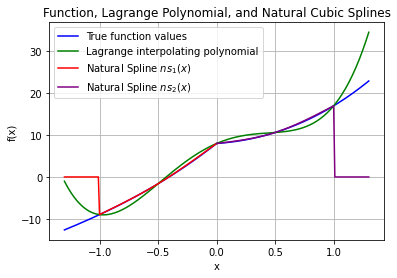

In [13]:
# d)
import numpy as np
import matplotlib.pyplot as plt

# Define intervals for plotting
xp1 = np.linspace(-1.3, 1.3, 261)
xp2 = np.linspace(-1.3, 0, 131)
xp3 = np.linspace(0, 1.3, 131)

# Define the true function
f = lambda x: -10 * np.abs(x) + (x + 2)**3

# Define the Lagrange interpolating polynomial P_L(x)
pl = lambda x: -9 + 14.75 * (x + 1) + 4.5 * (x + 1) * (x + 0.5) - 12.3333 * (x + 1) * (x + 0.5) * x + 13.3333 * (x + 1) * (x + 0.5) * x * (x - 0.5)

# Define the natural cubic spline ns_1(x) for interval [-1, 0]
ns_1 = lambda x: np.piecewise(x, 
                              [(-1 <= x) & (x <= -0.5), (-0.5 < x) & (x <= 0)], 
                              [lambda x: -9 + 13.625 * (x + 1) + 0 * (x + 1)**2 + 4.5 * (x + 1)**3,
                               lambda x: -1.625 + 17 * (x + 0.5) + 6.75 * (x + 0.5)**2 - 4.5 * (x + 0.5)**3])

# Define the natural cubic spline ns_2(x) for interval [0, 1]
ns_2 = lambda x: np.piecewise(x,
                              [(0 <= x) & (x <= 0.5), (0.5 < x) & (x <= 1)],
                              [lambda x: 8 + 3.375 * x + 0 * x**2 + 7.5 * x**3,
                               lambda x: 10.625 + 9 * (x - 0.5) + 11.25 * (x - 0.5)**2 - 7.5 * (x - 0.5)**3])

# Plotting
plt.plot(xp1, f(xp1), color="blue", label="True function values")  # True function
plt.plot(xp1, pl(xp1), color="green", label="Lagrange interpolating polynomial")  # Lagrange interpolating polynomial
plt.plot(xp2, ns_1(xp2), color="red", label="Natural Spline ns_1(x)")  # Natural spline for interval [-1, 0]
plt.plot(xp3, ns_2(xp3), color="purple", label="Natural Spline ns_2(x)")  # Natural spline for interval [0, 1]

# Add legend and show plot
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function, Lagrange Polynomial, and Natural Cubic Splines")
plt.grid(True)
plt.show()


Natural spline fits the function better in $[-1, 1]$. (Supposed to...) Fit in the whole interval, including outside of $[-1, 1]$. Fit near $x=0$.

### Let $f(x) = e^x cos x$.

### (a) 
Use the forward-difference formula eq. (4.1), the three-point formula eq. (4.5), and
the five-point formula eq. (4.6) in the textbook to approximate $f′(0)$ to 10 digits after
the decimal point with h = 0.1.
### (b) 
Find the absolute errors of the three approximations in (a) with respect to the exact
value of $f′(0)$.
### (c)
Use the three-point formula eq. (4.5) to approximate $f′(0)$. Find the absolute errors
of the approximations when h = $10^{−1}, 10^{−2}, 10^{−3}, . . . , 10^{−10}$. Do the errors decrease
when h decreases? Explain the reason.

(a)
1. Forward-Difference Formula:
$f'(x) \approx \frac{f(x+h) - f(x)}{h}$

2. Three-Point Formula:
$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$

3. Five-Point Formula
$f(x) \approx \frac{-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x-2h)}{12h}$

In [15]:
import numpy as np

# Define the function
f = lambda x: np.exp(x) * np.cos(x)

# Step size and inital point
x0 = 0
h = 0.1

# Forward-Difference approximation
forward_diff = (f(x0 + h) - f(x0)) / h

# Three-Point Formula approximation
three_point = (f(x0 + h) - f(x0 - h)) / (2 * h)

# Five-Point Formula approximation
five_point = (-f(x0 + 2*h) + 8*f(x0 + h) - 8*f(x0 - h) + f(x0 - 2*h)) / (12 * h)

# Display results
print(f"Forward-Difference: {forward_diff:.10f}")
print(f"Three-Point Formula: {three_point:.10f}")
print(f"Five-Point Formula: {five_point:.10f}")


Forward-Difference: 0.9964966683
Three-Point Formula: 0.9966633349
Five-Point Formula: 1.0000133016


(b)
The exact derivative of $f(x)$ is $f'(x) = e^x(\cos(x) - \sin(x))$. So $f'(0) = e^0(\cos(0) - \sin(0)) = 1$.

In [16]:
# Exact derivative at x = 0
exact_derivative = 1.0

# Calculate absolute errors
error_forward = abs(forward_diff - exact_derivative)
error_three_point = abs(three_point - exact_derivative)
error_five_point = abs(five_point - exact_derivative)

# Display errors
print(f"Error (Forward-Difference): {error_forward:.10e}")
print(f"Error (Three-Point Formula): {error_three_point:.10e}")
print(f"Error (Five-Point Formula): {error_five_point:.10e}")


Error (Forward-Difference): 3.5033317059e-03
Error (Three-Point Formula): 3.3366650789e-03
Error (Five-Point Formula): 1.3301550293e-05


In [17]:
# c
# Define a range of h values: 10^-1, 10^-2, ..., 10^-10
h_values = [10**(-i) for i in range(1, 11)]

# List to store errors
errors = []

# Calculate derivative approximation and errors for each h
for h in h_values:
    approx = (f(0 + h) - f(0 - h)) / (2 * h)
    error = abs(approx - exact_derivative)
    errors.append(error)
    print(f"h = {h:.1e}, Approximation = {approx:.10f}, Error = {error:.10e}")


h = 1.0e-01, Approximation = 0.9966633349, Error = 3.3366650789e-03
h = 1.0e-02, Approximation = 0.9999666663, Error = 3.3333666676e-05
h = 1.0e-03, Approximation = 0.9999996667, Error = 3.3333336003e-07
h = 1.0e-04, Approximation = 0.9999999967, Error = 3.3329996540e-09
h = 1.0e-05, Approximation = 1.0000000000, Error = 3.7857827984e-11
h = 1.0e-06, Approximation = 1.0000000000, Error = 2.6755486715e-11
h = 1.0e-07, Approximation = 0.9999999989, Error = 1.0814673601e-09
h = 1.0e-08, Approximation = 0.9999999995, Error = 5.2635584780e-10
h = 1.0e-09, Approximation = 1.0000000272, Error = 2.7229219768e-08
h = 1.0e-10, Approximation = 1.0000000827, Error = 8.2740370999e-08


Errors do not necessarily decrease as $h$ decreases. THe influence of the round-off error increases when $h$ decreases.